In [11]:
import matplotlib.pyplot as plt
import numpy as np

#import tensorflow as tf
#import tensorflow_probability as tfp

from glob import glob #for parsing paths
from skimage import io #for loading images
from skimage.transform import resize #for downsizing
from skimage.color import rgb2gray #for converting to grayscale
from imblearn.over_sampling import RandomOverSampler #for class balance
from utils import loadData, saveData

In [83]:
def load_data(downsize = True, downsize_shape = (256, 256)):
    '''Load the images, downsize if true, convert to greyscale, combine and generate labels.'''
    
    #get list of image paths
    files_normal = glob('data\\chest_xray\\normal\\*.jpeg')
    files_pneumonia = glob('data\\chest_xray\\pneumonia\\*.jpeg')
    
    #load images, downsize, and append to numpy arrays
    normal = np.zeros((len(files_normal), *downsize_shape), dtype = np.uint8)
    for i, fname in enumerate(files_normal):
        print('({}/{}) Loading image {} ...'.format(i, len(files_normal), fname))
        #downsize image if true
        if downsize:
            img = resize(io.imread(fname), downsize_shape)
        #some images are RGB for some reason so convert to grayscale if that is the case
        if img.ndim == 3:
            img = rgb2gray(img)
        normal[i] = np.asarray(img * 255.0).astype(np.uint8)
    
    pneumonia = np.zeros((len(files_pneumonia), *downsize_shape), dtype = np.uint8)
    for i, fname in enumerate(files_pneumonia):
        print('({}/{}) Loading image {} ...'.format(i, len(files_pneumonia), fname))
        #downsize image if true
        if downsize:
            img = resize(io.imread(fname), downsize_shape)
        #some images are RGB for some reason so convert to grayscale if that is the case
        if img.ndim == 3:
            img = rgb2gray(img)
        pneumonia[i] = np.asarray(img * 255.0).astype(np.uint8)
    
    #combine into one array and generate labels {0:normal, 1:pneumonia}
    print('Combing data and generating labels ...', end = ' ')
    n, p = normal.shape[0], pneumonia.shape[0]
    data = np.zeros((n + p, *downsize_shape), dtype = np.uint8)
    labels = np.zeros((n + p, ), dtype = np.uint8)
    data[0:n, :, :] = normal
    data[n:n + p, :, :] = pneumonia
    labels[0:n] = 0
    labels[n:n + p] = 1
    
    print('Done!')
    return data, labels

def plotClassDist(labels):
    '''Plot the class distribution.'''
    classes, count = np.unique(labels, return_counts=True)
    plt.bar(classes, count, tick_label = classes.astype(np.int))
    plt.title('Class Distribution')
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.show()

def plotSamples(data, labels, columns = 5, rows = 5):
    '''Plot a grid of randomly sampled images of size columns by rows.'''
    class_names = ['Normal', 'Pneumonia']
    plt.figure(figsize=(10,10))
    for i in range(rows * columns):
        idx = np.random.randint(0, data.shape[0])
        plt.subplot(columns, rows, i + 1)
        plt.xticks([]); plt.yticks([]);
        plt.grid(False)
        plt.imshow(data[idx, :, :], cmap=plt.cm.gray)
        plt.xlabel(class_names[int(labels[idx])])
    plt.show()    

def randomOversample(data, labels):
    '''Randomly oversample the data. We need to flatten the images first and the deflatten when done.'''
    shp = data.shape
    data = data.reshape(shp[0], shp[1] * shp[2]) #flatten data
    ros = RandomOverSampler(random_state=42)
    data, labels = ros.fit_resample(data, labels) #oversample
    data = data.reshape(data.shape[0], shp[1], shp[2]) #de-flatten data
    return data, labels
    

In [17]:
data, labels = load_data()

(0/1583) Loading image data\chest_xray\normal\IM-0001-0001.jpeg ...
(1/1583) Loading image data\chest_xray\normal\IM-0003-0001.jpeg ...
(2/1583) Loading image data\chest_xray\normal\IM-0005-0001.jpeg ...
(3/1583) Loading image data\chest_xray\normal\IM-0006-0001.jpeg ...
(4/1583) Loading image data\chest_xray\normal\IM-0007-0001.jpeg ...
(5/1583) Loading image data\chest_xray\normal\IM-0009-0001.jpeg ...
(6/1583) Loading image data\chest_xray\normal\IM-0010-0001.jpeg ...
(7/1583) Loading image data\chest_xray\normal\IM-0011-0001-0001.jpeg ...
(8/1583) Loading image data\chest_xray\normal\IM-0011-0001-0002.jpeg ...
(9/1583) Loading image data\chest_xray\normal\IM-0011-0001.jpeg ...
(10/1583) Loading image data\chest_xray\normal\IM-0013-0001.jpeg ...
(11/1583) Loading image data\chest_xray\normal\IM-0015-0001.jpeg ...
(12/1583) Loading image data\chest_xray\normal\IM-0016-0001.jpeg ...
(13/1583) Loading image data\chest_xray\normal\IM-0017-0001.jpeg ...
(14/1583) Loading image data\chest

(119/1583) Loading image data\chest_xray\normal\IM-0211-0001.jpeg ...
(120/1583) Loading image data\chest_xray\normal\IM-0213-0001.jpeg ...
(121/1583) Loading image data\chest_xray\normal\IM-0214-0001.jpeg ...
(122/1583) Loading image data\chest_xray\normal\IM-0215-0001.jpeg ...
(123/1583) Loading image data\chest_xray\normal\IM-0216-0001.jpeg ...
(124/1583) Loading image data\chest_xray\normal\IM-0217-0001.jpeg ...
(125/1583) Loading image data\chest_xray\normal\IM-0218-0001.jpeg ...
(126/1583) Loading image data\chest_xray\normal\IM-0219-0001.jpeg ...
(127/1583) Loading image data\chest_xray\normal\IM-0220-0001.jpeg ...
(128/1583) Loading image data\chest_xray\normal\IM-0221-0001.jpeg ...
(129/1583) Loading image data\chest_xray\normal\IM-0222-0001.jpeg ...
(130/1583) Loading image data\chest_xray\normal\IM-0223-0001.jpeg ...
(131/1583) Loading image data\chest_xray\normal\IM-0224-0001.jpeg ...
(132/1583) Loading image data\chest_xray\normal\IM-0225-0001.jpeg ...
(133/1583) Loading i

(240/1583) Loading image data\chest_xray\normal\IM-0358-0001.jpeg ...
(241/1583) Loading image data\chest_xray\normal\IM-0359-0001.jpeg ...
(242/1583) Loading image data\chest_xray\normal\IM-0361-0001.jpeg ...
(243/1583) Loading image data\chest_xray\normal\IM-0362-0001.jpeg ...
(244/1583) Loading image data\chest_xray\normal\IM-0363-0001.jpeg ...
(245/1583) Loading image data\chest_xray\normal\IM-0364-0001.jpeg ...
(246/1583) Loading image data\chest_xray\normal\IM-0365-0001.jpeg ...
(247/1583) Loading image data\chest_xray\normal\IM-0367-0001.jpeg ...
(248/1583) Loading image data\chest_xray\normal\IM-0368-0001.jpeg ...
(249/1583) Loading image data\chest_xray\normal\IM-0369-0001.jpeg ...
(250/1583) Loading image data\chest_xray\normal\IM-0370-0001.jpeg ...
(251/1583) Loading image data\chest_xray\normal\IM-0371-0001.jpeg ...
(252/1583) Loading image data\chest_xray\normal\IM-0372-0001.jpeg ...
(253/1583) Loading image data\chest_xray\normal\IM-0374-0001.jpeg ...
(254/1583) Loading i

(359/1583) Loading image data\chest_xray\normal\IM-0491-0001-0001.jpeg ...
(360/1583) Loading image data\chest_xray\normal\IM-0491-0001-0002.jpeg ...
(361/1583) Loading image data\chest_xray\normal\IM-0491-0001.jpeg ...
(362/1583) Loading image data\chest_xray\normal\IM-0492-0001.jpeg ...
(363/1583) Loading image data\chest_xray\normal\IM-0493-0001.jpeg ...
(364/1583) Loading image data\chest_xray\normal\IM-0494-0001.jpeg ...
(365/1583) Loading image data\chest_xray\normal\IM-0495-0001.jpeg ...
(366/1583) Loading image data\chest_xray\normal\IM-0496-0001.jpeg ...
(367/1583) Loading image data\chest_xray\normal\IM-0497-0001-0001.jpeg ...
(368/1583) Loading image data\chest_xray\normal\IM-0497-0001-0002.jpeg ...
(369/1583) Loading image data\chest_xray\normal\IM-0497-0001.jpeg ...
(370/1583) Loading image data\chest_xray\normal\IM-0499-0001-0001.jpeg ...
(371/1583) Loading image data\chest_xray\normal\IM-0499-0001-0002.jpeg ...
(372/1583) Loading image data\chest_xray\normal\IM-0499-0001

(475/1583) Loading image data\chest_xray\normal\IM-0575-0001.jpeg ...
(476/1583) Loading image data\chest_xray\normal\IM-0577-0001.jpeg ...
(477/1583) Loading image data\chest_xray\normal\IM-0578-0001.jpeg ...
(478/1583) Loading image data\chest_xray\normal\IM-0579-0001.jpeg ...
(479/1583) Loading image data\chest_xray\normal\IM-0580-0001.jpeg ...
(480/1583) Loading image data\chest_xray\normal\IM-0581-0001.jpeg ...
(481/1583) Loading image data\chest_xray\normal\IM-0582-0001.jpeg ...
(482/1583) Loading image data\chest_xray\normal\IM-0583-0001.jpeg ...
(483/1583) Loading image data\chest_xray\normal\IM-0584-0001.jpeg ...
(484/1583) Loading image data\chest_xray\normal\IM-0586-0001.jpeg ...
(485/1583) Loading image data\chest_xray\normal\IM-0588-0001.jpeg ...
(486/1583) Loading image data\chest_xray\normal\IM-0590-0001.jpeg ...
(487/1583) Loading image data\chest_xray\normal\IM-0591-0001.jpeg ...
(488/1583) Loading image data\chest_xray\normal\IM-0592-0001.jpeg ...
(489/1583) Loading i

(591/1583) Loading image data\chest_xray\normal\IM-0673-0001.jpeg ...
(592/1583) Loading image data\chest_xray\normal\IM-0674-0001.jpeg ...
(593/1583) Loading image data\chest_xray\normal\IM-0675-0001.jpeg ...
(594/1583) Loading image data\chest_xray\normal\IM-0676-0001.jpeg ...
(595/1583) Loading image data\chest_xray\normal\IM-0677-0001.jpeg ...
(596/1583) Loading image data\chest_xray\normal\IM-0678-0001.jpeg ...
(597/1583) Loading image data\chest_xray\normal\IM-0679-0001.jpeg ...
(598/1583) Loading image data\chest_xray\normal\IM-0680-0001.jpeg ...
(599/1583) Loading image data\chest_xray\normal\IM-0681-0001.jpeg ...
(600/1583) Loading image data\chest_xray\normal\IM-0682-0001.jpeg ...
(601/1583) Loading image data\chest_xray\normal\IM-0683-0001.jpeg ...
(602/1583) Loading image data\chest_xray\normal\IM-0684-0001.jpeg ...
(603/1583) Loading image data\chest_xray\normal\IM-0685-0001.jpeg ...
(604/1583) Loading image data\chest_xray\normal\IM-0686-0001.jpeg ...
(605/1583) Loading i

(704/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0130-0001.jpeg ...
(705/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0131-0001.jpeg ...
(706/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0132-0001.jpeg ...
(707/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0135-0001.jpeg ...
(708/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0139-0001.jpeg ...
(709/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0141-0001.jpeg ...
(710/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0145-0001.jpeg ...
(711/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0146-0001.jpeg ...
(712/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0150-0001.jpeg ...
(713/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0171-0001.jpeg ...
(714/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0173-0001-0001.jpeg ...
(715/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0173-0001-0002.jpeg ...
(716/1583) Loading image data\chest_xray\normal\NORMAL

(809/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0352-0001.jpeg ...
(810/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0353-0001.jpeg ...
(811/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0354-0001.jpeg ...
(812/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0357-0001.jpeg ...
(813/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0359-0001.jpeg ...
(814/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0360-0001.jpeg ...
(815/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0361-0001.jpeg ...
(816/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0362-0001.jpeg ...
(817/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0364-0001.jpeg ...
(818/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0366-0001.jpeg ...
(819/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0368-0001.jpeg ...
(820/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0369-0001.jpeg ...
(821/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0370-

(915/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0490-0001.jpeg ...
(916/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0491-0001.jpeg ...
(917/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0493-0001.jpeg ...
(918/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0496-0001.jpeg ...
(919/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0497-0001.jpeg ...
(920/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0499-0001.jpeg ...
(921/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0500-0001.jpeg ...
(922/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0501-0001.jpeg ...
(923/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0502-0001.jpeg ...
(924/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0503-0001.jpeg ...
(925/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0506-0001.jpeg ...
(926/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0507-0001.jpeg ...
(927/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0508-

(1021/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0640-0001.jpeg ...
(1022/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0641-0001.jpeg ...
(1023/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0642-0001.jpeg ...
(1024/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0643-0001.jpeg ...
(1025/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0645-0001.jpeg ...
(1026/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0647-0001.jpeg ...
(1027/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0648-0001.jpeg ...
(1028/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0649-0001.jpeg ...
(1029/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0650-0001.jpeg ...
(1030/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0651-0001.jpeg ...
(1031/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0651-0004.jpeg ...
(1032/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0652-0001.jpeg ...
(1033/1583) Loading image data\chest_xray\normal\NOR

(1126/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0832-0001-0001.jpeg ...
(1127/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0832-0001-0002.jpeg ...
(1128/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0832-0001.jpeg ...
(1129/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0833-0001.jpeg ...
(1130/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0834-0001.jpeg ...
(1131/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0836-0001.jpeg ...
(1132/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0837-0001.jpeg ...
(1133/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0838-0001.jpeg ...
(1134/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0839-0001.jpeg ...
(1135/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0840-0001.jpeg ...
(1136/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0841-0001.jpeg ...
(1137/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0842-0001.jpeg ...
(1138/1583) Loading image data\chest_xray\

(1232/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0954-0001.jpeg ...
(1233/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0955-0001.jpeg ...
(1234/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0956-0001.jpeg ...
(1235/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0957-0001.jpeg ...
(1236/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0959-0001.jpeg ...
(1237/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0960-0001.jpeg ...
(1238/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0961-0001.jpeg ...
(1239/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0962-0001.jpeg ...
(1240/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0965-0001.jpeg ...
(1241/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0966-0001.jpeg ...
(1242/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0967-0001.jpeg ...
(1243/1583) Loading image data\chest_xray\normal\NORMAL2-IM-0969-0001.jpeg ...
(1244/1583) Loading image data\chest_xray\normal\NOR

(1336/1583) Loading image data\chest_xray\normal\NORMAL2-IM-1096-0001-0003.jpeg ...
(1337/1583) Loading image data\chest_xray\normal\NORMAL2-IM-1096-0001.jpeg ...
(1338/1583) Loading image data\chest_xray\normal\NORMAL2-IM-1098-0001.jpeg ...
(1339/1583) Loading image data\chest_xray\normal\NORMAL2-IM-1100-0001.jpeg ...
(1340/1583) Loading image data\chest_xray\normal\NORMAL2-IM-1102-0001-0001.jpeg ...
(1341/1583) Loading image data\chest_xray\normal\NORMAL2-IM-1102-0001-0002.jpeg ...
(1342/1583) Loading image data\chest_xray\normal\NORMAL2-IM-1102-0001.jpeg ...
(1343/1583) Loading image data\chest_xray\normal\NORMAL2-IM-1103-0001-0001.jpeg ...
(1344/1583) Loading image data\chest_xray\normal\NORMAL2-IM-1104-0001.jpeg ...
(1345/1583) Loading image data\chest_xray\normal\NORMAL2-IM-1105-0001.jpeg ...
(1346/1583) Loading image data\chest_xray\normal\NORMAL2-IM-1106-0001.jpeg ...
(1347/1583) Loading image data\chest_xray\normal\NORMAL2-IM-1108-0001.jpeg ...
(1348/1583) Loading image data\c

(1439/1583) Loading image data\chest_xray\normal\NORMAL2-IM-1214-0001.jpeg ...
(1440/1583) Loading image data\chest_xray\normal\NORMAL2-IM-1218-0001.jpeg ...
(1441/1583) Loading image data\chest_xray\normal\NORMAL2-IM-1219-0001.jpeg ...
(1442/1583) Loading image data\chest_xray\normal\NORMAL2-IM-1220-0001.jpeg ...
(1443/1583) Loading image data\chest_xray\normal\NORMAL2-IM-1221-0001.jpeg ...
(1444/1583) Loading image data\chest_xray\normal\NORMAL2-IM-1222-0001.jpeg ...
(1445/1583) Loading image data\chest_xray\normal\NORMAL2-IM-1223-0001.jpeg ...
(1446/1583) Loading image data\chest_xray\normal\NORMAL2-IM-1224-0001.jpeg ...
(1447/1583) Loading image data\chest_xray\normal\NORMAL2-IM-1225-0001.jpeg ...
(1448/1583) Loading image data\chest_xray\normal\NORMAL2-IM-1226-0001.jpeg ...
(1449/1583) Loading image data\chest_xray\normal\NORMAL2-IM-1227-0001.jpeg ...
(1450/1583) Loading image data\chest_xray\normal\NORMAL2-IM-1228-0001.jpeg ...
(1451/1583) Loading image data\chest_xray\normal\NOR

(1544/1583) Loading image data\chest_xray\normal\NORMAL2-IM-1338-0001.jpeg ...
(1545/1583) Loading image data\chest_xray\normal\NORMAL2-IM-1341-0001.jpeg ...
(1546/1583) Loading image data\chest_xray\normal\NORMAL2-IM-1342-0001.jpeg ...
(1547/1583) Loading image data\chest_xray\normal\NORMAL2-IM-1343-0001.jpeg ...
(1548/1583) Loading image data\chest_xray\normal\NORMAL2-IM-1344-0001.jpeg ...
(1549/1583) Loading image data\chest_xray\normal\NORMAL2-IM-1345-0001-0001.jpeg ...
(1550/1583) Loading image data\chest_xray\normal\NORMAL2-IM-1345-0001-0002.jpeg ...
(1551/1583) Loading image data\chest_xray\normal\NORMAL2-IM-1345-0001.jpeg ...
(1552/1583) Loading image data\chest_xray\normal\NORMAL2-IM-1346-0001.jpeg ...
(1553/1583) Loading image data\chest_xray\normal\NORMAL2-IM-1347-0001.jpeg ...
(1554/1583) Loading image data\chest_xray\normal\NORMAL2-IM-1348-0001.jpeg ...
(1555/1583) Loading image data\chest_xray\normal\NORMAL2-IM-1349-0001.jpeg ...
(1556/1583) Loading image data\chest_xray\

(63/4273) Loading image data\chest_xray\pneumonia\person1031_bacteria_2963.jpeg ...
(64/4273) Loading image data\chest_xray\pneumonia\person1031_bacteria_2964.jpeg ...
(65/4273) Loading image data\chest_xray\pneumonia\person1031_virus_1723.jpeg ...
(66/4273) Loading image data\chest_xray\pneumonia\person1033_bacteria_2966.jpeg ...
(67/4273) Loading image data\chest_xray\pneumonia\person1034_bacteria_2968.jpeg ...
(68/4273) Loading image data\chest_xray\pneumonia\person1034_virus_1728.jpeg ...
(69/4273) Loading image data\chest_xray\pneumonia\person1035_bacteria_2969.jpeg ...
(70/4273) Loading image data\chest_xray\pneumonia\person1035_virus_1729.jpeg ...
(71/4273) Loading image data\chest_xray\pneumonia\person1036_bacteria_2970.jpeg ...
(72/4273) Loading image data\chest_xray\pneumonia\person1036_virus_1730.jpeg ...
(73/4273) Loading image data\chest_xray\pneumonia\person1037_bacteria_2971.jpeg ...
(74/4273) Loading image data\chest_xray\pneumonia\person1038_bacteria_2972.jpeg ...
(75/

(164/4273) Loading image data\chest_xray\pneumonia\person1084_virus_1796.jpeg ...
(165/4273) Loading image data\chest_xray\pneumonia\person1085_bacteria_3025.jpeg ...
(166/4273) Loading image data\chest_xray\pneumonia\person1085_virus_1797.jpeg ...
(167/4273) Loading image data\chest_xray\pneumonia\person1086_bacteria_3026.jpeg ...
(168/4273) Loading image data\chest_xray\pneumonia\person1086_virus_1798.jpeg ...
(169/4273) Loading image data\chest_xray\pneumonia\person1087_bacteria_3027.jpeg ...
(170/4273) Loading image data\chest_xray\pneumonia\person1087_virus_1799.jpeg ...
(171/4273) Loading image data\chest_xray\pneumonia\person1088_bacteria_3028.jpeg ...
(172/4273) Loading image data\chest_xray\pneumonia\person1088_virus_1800.jpeg ...
(173/4273) Loading image data\chest_xray\pneumonia\person1089_bacteria_3029.jpeg ...
(174/4273) Loading image data\chest_xray\pneumonia\person1089_virus_1808.jpeg ...
(175/4273) Loading image data\chest_xray\pneumonia\person108_bacteria_504.jpeg ...


(267/4273) Loading image data\chest_xray\pneumonia\person112_bacteria_538.jpeg ...
(268/4273) Loading image data\chest_xray\pneumonia\person112_bacteria_539.jpeg ...
(269/4273) Loading image data\chest_xray\pneumonia\person112_virus_213.jpeg ...
(270/4273) Loading image data\chest_xray\pneumonia\person1130_bacteria_3072.jpeg ...
(271/4273) Loading image data\chest_xray\pneumonia\person1130_virus_1860.jpeg ...
(272/4273) Loading image data\chest_xray\pneumonia\person1131_bacteria_3073.jpeg ...
(273/4273) Loading image data\chest_xray\pneumonia\person1132_virus_1863.jpeg ...
(274/4273) Loading image data\chest_xray\pneumonia\person1133_bacteria_3075.jpeg ...
(275/4273) Loading image data\chest_xray\pneumonia\person1133_virus_1865.jpeg ...
(276/4273) Loading image data\chest_xray\pneumonia\person1134_bacteria_3076.jpeg ...
(277/4273) Loading image data\chest_xray\pneumonia\person1135_bacteria_3077.jpeg ...
(278/4273) Loading image data\chest_xray\pneumonia\person1136_bacteria_3078.jpeg ..

(367/4273) Loading image data\chest_xray\pneumonia\person1170_virus_1970.jpeg ...
(368/4273) Loading image data\chest_xray\pneumonia\person1171_bacteria_3118.jpeg ...
(369/4273) Loading image data\chest_xray\pneumonia\person1172_bacteria_3119.jpeg ...
(370/4273) Loading image data\chest_xray\pneumonia\person1172_virus_1977.jpeg ...
(371/4273) Loading image data\chest_xray\pneumonia\person1173_virus_1978.jpeg ...
(372/4273) Loading image data\chest_xray\pneumonia\person1174_virus_1980.jpeg ...
(373/4273) Loading image data\chest_xray\pneumonia\person1175_bacteria_3122.jpeg ...
(374/4273) Loading image data\chest_xray\pneumonia\person1175_virus_1981.jpeg ...
(375/4273) Loading image data\chest_xray\pneumonia\person1176_bacteria_3123.jpeg ...
(376/4273) Loading image data\chest_xray\pneumonia\person1176_bacteria_3124.jpeg ...
(377/4273) Loading image data\chest_xray\pneumonia\person1176_virus_1996.jpeg ...
(378/4273) Loading image data\chest_xray\pneumonia\person1176_virus_1997.jpeg ...
(

(468/4273) Loading image data\chest_xray\pneumonia\person1216_virus_2062.jpeg ...
(469/4273) Loading image data\chest_xray\pneumonia\person1217_bacteria_3169.jpeg ...
(470/4273) Loading image data\chest_xray\pneumonia\person1217_virus_2063.jpeg ...
(471/4273) Loading image data\chest_xray\pneumonia\person1218_bacteria_3171.jpeg ...
(472/4273) Loading image data\chest_xray\pneumonia\person1218_virus_2066.jpeg ...
(473/4273) Loading image data\chest_xray\pneumonia\person1219_bacteria_3172.jpeg ...
(474/4273) Loading image data\chest_xray\pneumonia\person1219_virus_2067.jpeg ...
(475/4273) Loading image data\chest_xray\pneumonia\person121_bacteria_575.jpeg ...
(476/4273) Loading image data\chest_xray\pneumonia\person121_bacteria_576.jpeg ...
(477/4273) Loading image data\chest_xray\pneumonia\person121_bacteria_578.jpeg ...
(478/4273) Loading image data\chest_xray\pneumonia\person121_bacteria_579.jpeg ...
(479/4273) Loading image data\chest_xray\pneumonia\person121_bacteria_580.jpeg ...
(4

(573/4273) Loading image data\chest_xray\pneumonia\person1258_virus_2138.jpeg ...
(574/4273) Loading image data\chest_xray\pneumonia\person1259_bacteria_3217.jpeg ...
(575/4273) Loading image data\chest_xray\pneumonia\person1259_virus_2139.jpeg ...
(576/4273) Loading image data\chest_xray\pneumonia\person125_bacteria_594.jpeg ...
(577/4273) Loading image data\chest_xray\pneumonia\person125_bacteria_595.jpeg ...
(578/4273) Loading image data\chest_xray\pneumonia\person125_virus_254.jpeg ...
(579/4273) Loading image data\chest_xray\pneumonia\person1260_bacteria_3218.jpeg ...
(580/4273) Loading image data\chest_xray\pneumonia\person1260_virus_2140.jpeg ...
(581/4273) Loading image data\chest_xray\pneumonia\person1261_bacteria_3219.jpeg ...
(582/4273) Loading image data\chest_xray\pneumonia\person1261_virus_2145.jpeg ...
(583/4273) Loading image data\chest_xray\pneumonia\person1261_virus_2147.jpeg ...
(584/4273) Loading image data\chest_xray\pneumonia\person1261_virus_2148.jpeg ...
(585/42

(674/4273) Loading image data\chest_xray\pneumonia\person1305_bacteria_3271.jpeg ...
(675/4273) Loading image data\chest_xray\pneumonia\person1306_bacteria_3272.jpeg ...
(676/4273) Loading image data\chest_xray\pneumonia\person1306_bacteria_3274.jpeg ...
(677/4273) Loading image data\chest_xray\pneumonia\person1306_bacteria_3275.jpeg ...
(678/4273) Loading image data\chest_xray\pneumonia\person1306_bacteria_3276.jpeg ...
(679/4273) Loading image data\chest_xray\pneumonia\person1306_bacteria_3277.jpeg ...
(680/4273) Loading image data\chest_xray\pneumonia\person1306_virus_2249.jpeg ...
(681/4273) Loading image data\chest_xray\pneumonia\person1307_bacteria_3278.jpeg ...
(682/4273) Loading image data\chest_xray\pneumonia\person1307_virus_2251.jpeg ...
(683/4273) Loading image data\chest_xray\pneumonia\person1308_bacteria_3280.jpeg ...
(684/4273) Loading image data\chest_xray\pneumonia\person1308_bacteria_3283.jpeg ...
(685/4273) Loading image data\chest_xray\pneumonia\person1308_bacteria_

(772/4273) Loading image data\chest_xray\pneumonia\person1331_virus_2299.jpeg ...
(773/4273) Loading image data\chest_xray\pneumonia\person1332_virus_2300.jpeg ...
(774/4273) Loading image data\chest_xray\pneumonia\person1333_bacteria_3383.jpeg ...
(775/4273) Loading image data\chest_xray\pneumonia\person1333_bacteria_3384.jpeg ...
(776/4273) Loading image data\chest_xray\pneumonia\person1333_bacteria_3385.jpeg ...
(777/4273) Loading image data\chest_xray\pneumonia\person1333_bacteria_3386.jpeg ...
(778/4273) Loading image data\chest_xray\pneumonia\person1333_virus_2301.jpeg ...
(779/4273) Loading image data\chest_xray\pneumonia\person1336_virus_2306.jpeg ...
(780/4273) Loading image data\chest_xray\pneumonia\person1337_virus_2307.jpeg ...
(781/4273) Loading image data\chest_xray\pneumonia\person1338_bacteria_3394.jpeg ...
(782/4273) Loading image data\chest_xray\pneumonia\person1338_bacteria_3395.jpeg ...
(783/4273) Loading image data\chest_xray\pneumonia\person1338_bacteria_3397.jpeg

(871/4273) Loading image data\chest_xray\pneumonia\person1366_bacteria_3490.jpeg ...
(872/4273) Loading image data\chest_xray\pneumonia\person1366_virus_2349.jpeg ...
(873/4273) Loading image data\chest_xray\pneumonia\person1367_virus_2351.jpeg ...
(874/4273) Loading image data\chest_xray\pneumonia\person1368_virus_2352.jpeg ...
(875/4273) Loading image data\chest_xray\pneumonia\person1368_virus_2353.jpeg ...
(876/4273) Loading image data\chest_xray\pneumonia\person1368_virus_2354.jpeg ...
(877/4273) Loading image data\chest_xray\pneumonia\person1369_virus_2355.jpeg ...
(878/4273) Loading image data\chest_xray\pneumonia\person1369_virus_2356.jpeg ...
(879/4273) Loading image data\chest_xray\pneumonia\person136_bacteria_648.jpeg ...
(880/4273) Loading image data\chest_xray\pneumonia\person136_bacteria_649.jpeg ...
(881/4273) Loading image data\chest_xray\pneumonia\person136_bacteria_650.jpeg ...
(882/4273) Loading image data\chest_xray\pneumonia\person136_bacteria_652.jpeg ...
(883/4273

(970/4273) Loading image data\chest_xray\pneumonia\person1408_virus_2411.jpeg ...
(971/4273) Loading image data\chest_xray\pneumonia\person1409_bacteria_3583.jpeg ...
(972/4273) Loading image data\chest_xray\pneumonia\person1409_bacteria_3585.jpeg ...
(973/4273) Loading image data\chest_xray\pneumonia\person1409_virus_2413.jpeg ...
(974/4273) Loading image data\chest_xray\pneumonia\person140_bacteria_667.jpeg ...
(975/4273) Loading image data\chest_xray\pneumonia\person140_bacteria_668.jpeg ...
(976/4273) Loading image data\chest_xray\pneumonia\person140_virus_284.jpeg ...
(977/4273) Loading image data\chest_xray\pneumonia\person140_virus_285.jpeg ...
(978/4273) Loading image data\chest_xray\pneumonia\person1411_bacteria_3591.jpeg ...
(979/4273) Loading image data\chest_xray\pneumonia\person1411_bacteria_3593.jpeg ...
(980/4273) Loading image data\chest_xray\pneumonia\person1411_bacteria_3598.jpeg ...
(981/4273) Loading image data\chest_xray\pneumonia\person1411_bacteria_3599.jpeg ...


(1069/4273) Loading image data\chest_xray\pneumonia\person1445_bacteria_3735.jpeg ...
(1070/4273) Loading image data\chest_xray\pneumonia\person1446_bacteria_3737.jpeg ...
(1071/4273) Loading image data\chest_xray\pneumonia\person1446_bacteria_3739.jpeg ...
(1072/4273) Loading image data\chest_xray\pneumonia\person1446_bacteria_3740.jpeg ...
(1073/4273) Loading image data\chest_xray\pneumonia\person1447_bacteria_3741.jpeg ...
(1074/4273) Loading image data\chest_xray\pneumonia\person1448_virus_2468.jpeg ...
(1075/4273) Loading image data\chest_xray\pneumonia\person1449_bacteria_3743.jpeg ...
(1076/4273) Loading image data\chest_xray\pneumonia\person1449_bacteria_3745.jpeg ...
(1077/4273) Loading image data\chest_xray\pneumonia\person1449_bacteria_3746.jpeg ...
(1078/4273) Loading image data\chest_xray\pneumonia\person1449_bacteria_3747.jpeg ...
(1079/4273) Loading image data\chest_xray\pneumonia\person1449_virus_2474.jpeg ...
(1080/4273) Loading image data\chest_xray\pneumonia\person14

(1169/4273) Loading image data\chest_xray\pneumonia\person1480_virus_2566.jpeg ...
(1170/4273) Loading image data\chest_xray\pneumonia\person1481_bacteria_3862.jpeg ...
(1171/4273) Loading image data\chest_xray\pneumonia\person1481_bacteria_3863.jpeg ...
(1172/4273) Loading image data\chest_xray\pneumonia\person1481_bacteria_3864.jpeg ...
(1173/4273) Loading image data\chest_xray\pneumonia\person1481_bacteria_3865.jpeg ...
(1174/4273) Loading image data\chest_xray\pneumonia\person1481_bacteria_3866.jpeg ...
(1175/4273) Loading image data\chest_xray\pneumonia\person1481_bacteria_3867.jpeg ...
(1176/4273) Loading image data\chest_xray\pneumonia\person1481_bacteria_3868.jpeg ...
(1177/4273) Loading image data\chest_xray\pneumonia\person1481_virus_2567.jpeg ...
(1178/4273) Loading image data\chest_xray\pneumonia\person1482_bacteria_3870.jpeg ...
(1179/4273) Loading image data\chest_xray\pneumonia\person1482_bacteria_3874.jpeg ...
(1180/4273) Loading image data\chest_xray\pneumonia\person14

(1272/4273) Loading image data\chest_xray\pneumonia\person1513_bacteria_3962.jpeg ...
(1273/4273) Loading image data\chest_xray\pneumonia\person1513_virus_2632.jpeg ...
(1274/4273) Loading image data\chest_xray\pneumonia\person1514_bacteria_3964.jpeg ...
(1275/4273) Loading image data\chest_xray\pneumonia\person1514_virus_2633.jpeg ...
(1276/4273) Loading image data\chest_xray\pneumonia\person1516_virus_2643.jpeg ...
(1277/4273) Loading image data\chest_xray\pneumonia\person1517_bacteria_3968.jpeg ...
(1278/4273) Loading image data\chest_xray\pneumonia\person1517_virus_2644.jpeg ...
(1279/4273) Loading image data\chest_xray\pneumonia\person1518_bacteria_3969.jpeg ...
(1280/4273) Loading image data\chest_xray\pneumonia\person1518_virus_2645.jpeg ...
(1281/4273) Loading image data\chest_xray\pneumonia\person1519_bacteria_3970.jpeg ...
(1282/4273) Loading image data\chest_xray\pneumonia\person1519_virus_2646.jpeg ...
(1283/4273) Loading image data\chest_xray\pneumonia\person151_bacteria_7

(1372/4273) Loading image data\chest_xray\pneumonia\person1556_bacteria_4062.jpeg ...
(1373/4273) Loading image data\chest_xray\pneumonia\person1556_virus_2699.jpeg ...
(1374/4273) Loading image data\chest_xray\pneumonia\person1557_bacteria_4063.jpeg ...
(1375/4273) Loading image data\chest_xray\pneumonia\person1557_bacteria_4065.jpeg ...
(1376/4273) Loading image data\chest_xray\pneumonia\person1558_bacteria_4066.jpeg ...
(1377/4273) Loading image data\chest_xray\pneumonia\person1559_bacteria_4067.jpeg ...
(1378/4273) Loading image data\chest_xray\pneumonia\person155_bacteria_729.jpeg ...
(1379/4273) Loading image data\chest_xray\pneumonia\person155_bacteria_730.jpeg ...
(1380/4273) Loading image data\chest_xray\pneumonia\person155_bacteria_731.jpeg ...
(1381/4273) Loading image data\chest_xray\pneumonia\person155_virus_307.jpeg ...
(1382/4273) Loading image data\chest_xray\pneumonia\person1561_bacteria_4077.jpeg ...
(1383/4273) Loading image data\chest_xray\pneumonia\person1562_bacte

(1473/4273) Loading image data\chest_xray\pneumonia\person1600_virus_2777.jpeg ...
(1474/4273) Loading image data\chest_xray\pneumonia\person1601_bacteria_4209.jpeg ...
(1475/4273) Loading image data\chest_xray\pneumonia\person1601_bacteria_4212.jpeg ...
(1476/4273) Loading image data\chest_xray\pneumonia\person1602_bacteria_4218.jpeg ...
(1477/4273) Loading image data\chest_xray\pneumonia\person1602_virus_2780.jpeg ...
(1478/4273) Loading image data\chest_xray\pneumonia\person1603_virus_2781.jpeg ...
(1479/4273) Loading image data\chest_xray\pneumonia\person1604_virus_2782.jpeg ...
(1480/4273) Loading image data\chest_xray\pneumonia\person1605_bacteria_4226.jpeg ...
(1481/4273) Loading image data\chest_xray\pneumonia\person1607_bacteria_4232.jpeg ...
(1482/4273) Loading image data\chest_xray\pneumonia\person1607_virus_2785.jpeg ...
(1483/4273) Loading image data\chest_xray\pneumonia\person1608_bacteria_4235.jpeg ...
(1484/4273) Loading image data\chest_xray\pneumonia\person1608_virus_

(1576/4273) Loading image data\chest_xray\pneumonia\person1644_bacteria_4356.jpeg ...
(1577/4273) Loading image data\chest_xray\pneumonia\person1644_bacteria_4357.jpeg ...
(1578/4273) Loading image data\chest_xray\pneumonia\person1644_bacteria_4358.jpeg ...
(1579/4273) Loading image data\chest_xray\pneumonia\person1644_bacteria_4360.jpeg ...
(1580/4273) Loading image data\chest_xray\pneumonia\person1644_bacteria_4361.jpeg ...
(1581/4273) Loading image data\chest_xray\pneumonia\person1644_bacteria_4362.jpeg ...
(1582/4273) Loading image data\chest_xray\pneumonia\person1644_virus_2844.jpeg ...
(1583/4273) Loading image data\chest_xray\pneumonia\person1645_bacteria_4363.jpeg ...
(1584/4273) Loading image data\chest_xray\pneumonia\person1645_virus_2845.jpeg ...
(1585/4273) Loading image data\chest_xray\pneumonia\person1646_bacteria_4368.jpeg ...
(1586/4273) Loading image data\chest_xray\pneumonia\person1647_bacteria_4372.jpeg ...
(1587/4273) Loading image data\chest_xray\pneumonia\person16

(1678/4273) Loading image data\chest_xray\pneumonia\person1691_bacteria_4479.jpeg ...
(1679/4273) Loading image data\chest_xray\pneumonia\person1691_bacteria_4481.jpeg ...
(1680/4273) Loading image data\chest_xray\pneumonia\person1693_bacteria_4485.jpeg ...
(1681/4273) Loading image data\chest_xray\pneumonia\person1695_bacteria_4492.jpeg ...
(1682/4273) Loading image data\chest_xray\pneumonia\person1696_bacteria_4495.jpeg ...
(1683/4273) Loading image data\chest_xray\pneumonia\person1697_bacteria_4496.jpeg ...
(1684/4273) Loading image data\chest_xray\pneumonia\person1698_bacteria_4497.jpeg ...
(1685/4273) Loading image data\chest_xray\pneumonia\person1699_bacteria_4498.jpeg ...
(1686/4273) Loading image data\chest_xray\pneumonia\person16_bacteria_53.jpeg ...
(1687/4273) Loading image data\chest_xray\pneumonia\person16_bacteria_54.jpeg ...
(1688/4273) Loading image data\chest_xray\pneumonia\person16_bacteria_55.jpeg ...
(1689/4273) Loading image data\chest_xray\pneumonia\person16_virus

(1779/4273) Loading image data\chest_xray\pneumonia\person1812_bacteria_4667.jpeg ...
(1780/4273) Loading image data\chest_xray\pneumonia\person1814_bacteria_4669.jpeg ...
(1781/4273) Loading image data\chest_xray\pneumonia\person1816_bacteria_4673.jpeg ...
(1782/4273) Loading image data\chest_xray\pneumonia\person1816_bacteria_4674.jpeg ...
(1783/4273) Loading image data\chest_xray\pneumonia\person1817_bacteria_4675.jpeg ...
(1784/4273) Loading image data\chest_xray\pneumonia\person1818_bacteria_4676.jpeg ...
(1785/4273) Loading image data\chest_xray\pneumonia\person1819_bacteria_4677.jpeg ...
(1786/4273) Loading image data\chest_xray\pneumonia\person1823_bacteria_4682.jpeg ...
(1787/4273) Loading image data\chest_xray\pneumonia\person1830_bacteria_4693.jpeg ...
(1788/4273) Loading image data\chest_xray\pneumonia\person1835_bacteria_4699.jpeg ...
(1789/4273) Loading image data\chest_xray\pneumonia\person1838_bacteria_4703.jpeg ...
(1790/4273) Loading image data\chest_xray\pneumonia\pe

(1880/4273) Loading image data\chest_xray\pneumonia\person19_bacteria_58.jpeg ...
(1881/4273) Loading image data\chest_xray\pneumonia\person19_bacteria_59.jpeg ...
(1882/4273) Loading image data\chest_xray\pneumonia\person19_bacteria_60.jpeg ...
(1883/4273) Loading image data\chest_xray\pneumonia\person19_bacteria_61.jpeg ...
(1884/4273) Loading image data\chest_xray\pneumonia\person19_bacteria_62.jpeg ...
(1885/4273) Loading image data\chest_xray\pneumonia\person19_bacteria_63.jpeg ...
(1886/4273) Loading image data\chest_xray\pneumonia\person19_virus_50.jpeg ...
(1887/4273) Loading image data\chest_xray\pneumonia\person1_bacteria_1.jpeg ...
(1888/4273) Loading image data\chest_xray\pneumonia\person1_bacteria_2.jpeg ...
(1889/4273) Loading image data\chest_xray\pneumonia\person1_virus_11.jpeg ...
(1890/4273) Loading image data\chest_xray\pneumonia\person1_virus_12.jpeg ...
(1891/4273) Loading image data\chest_xray\pneumonia\person1_virus_13.jpeg ...
(1892/4273) Loading image data\ches

(1983/4273) Loading image data\chest_xray\pneumonia\person258_virus_539.jpeg ...
(1984/4273) Loading image data\chest_xray\pneumonia\person259_bacteria_1217.jpeg ...
(1985/4273) Loading image data\chest_xray\pneumonia\person259_bacteria_1219.jpeg ...
(1986/4273) Loading image data\chest_xray\pneumonia\person259_bacteria_1220.jpeg ...
(1987/4273) Loading image data\chest_xray\pneumonia\person259_virus_540.jpeg ...
(1988/4273) Loading image data\chest_xray\pneumonia\person25_bacteria_113.jpeg ...
(1989/4273) Loading image data\chest_xray\pneumonia\person25_bacteria_114.jpeg ...
(1990/4273) Loading image data\chest_xray\pneumonia\person25_bacteria_115.jpeg ...
(1991/4273) Loading image data\chest_xray\pneumonia\person25_bacteria_116.jpeg ...
(1992/4273) Loading image data\chest_xray\pneumonia\person25_bacteria_117.jpeg ...
(1993/4273) Loading image data\chest_xray\pneumonia\person25_bacteria_118.jpeg ...
(1994/4273) Loading image data\chest_xray\pneumonia\person25_bacteria_119.jpeg ...
(1

(2085/4273) Loading image data\chest_xray\pneumonia\person278_virus_574.jpeg ...
(2086/4273) Loading image data\chest_xray\pneumonia\person278_virus_575.jpeg ...
(2087/4273) Loading image data\chest_xray\pneumonia\person279_bacteria_1315.jpeg ...
(2088/4273) Loading image data\chest_xray\pneumonia\person279_bacteria_1316.jpeg ...
(2089/4273) Loading image data\chest_xray\pneumonia\person279_virus_576.jpeg ...
(2090/4273) Loading image data\chest_xray\pneumonia\person27_bacteria_135.jpeg ...
(2091/4273) Loading image data\chest_xray\pneumonia\person27_bacteria_136.jpeg ...
(2092/4273) Loading image data\chest_xray\pneumonia\person27_bacteria_137.jpeg ...
(2093/4273) Loading image data\chest_xray\pneumonia\person27_bacteria_138.jpeg ...
(2094/4273) Loading image data\chest_xray\pneumonia\person280_bacteria_1318.jpeg ...
(2095/4273) Loading image data\chest_xray\pneumonia\person280_bacteria_1320.jpeg ...
(2096/4273) Loading image data\chest_xray\pneumonia\person280_bacteria_1321.jpeg ...


(2185/4273) Loading image data\chest_xray\pneumonia\person300_bacteria_1423.jpeg ...
(2186/4273) Loading image data\chest_xray\pneumonia\person300_virus_621.jpeg ...
(2187/4273) Loading image data\chest_xray\pneumonia\person301_bacteria_1424.jpeg ...
(2188/4273) Loading image data\chest_xray\pneumonia\person301_bacteria_1427.jpeg ...
(2189/4273) Loading image data\chest_xray\pneumonia\person301_bacteria_1428.jpeg ...
(2190/4273) Loading image data\chest_xray\pneumonia\person301_bacteria_1429.jpeg ...
(2191/4273) Loading image data\chest_xray\pneumonia\person301_virus_622.jpeg ...
(2192/4273) Loading image data\chest_xray\pneumonia\person302_bacteria_1430.jpeg ...
(2193/4273) Loading image data\chest_xray\pneumonia\person302_virus_623.jpeg ...
(2194/4273) Loading image data\chest_xray\pneumonia\person303_bacteria_1431.jpeg ...
(2195/4273) Loading image data\chest_xray\pneumonia\person303_virus_624.jpeg ...
(2196/4273) Loading image data\chest_xray\pneumonia\person304_virus_625.jpeg ...


(2285/4273) Loading image data\chest_xray\pneumonia\person323_virus_656.jpeg ...
(2286/4273) Loading image data\chest_xray\pneumonia\person324_virus_658.jpeg ...
(2287/4273) Loading image data\chest_xray\pneumonia\person325_bacteria_1497.jpeg ...
(2288/4273) Loading image data\chest_xray\pneumonia\person325_bacteria_1498.jpeg ...
(2289/4273) Loading image data\chest_xray\pneumonia\person325_bacteria_1500.jpeg ...
(2290/4273) Loading image data\chest_xray\pneumonia\person325_bacteria_1501.jpeg ...
(2291/4273) Loading image data\chest_xray\pneumonia\person325_bacteria_1502.jpeg ...
(2292/4273) Loading image data\chest_xray\pneumonia\person325_virus_659.jpeg ...
(2293/4273) Loading image data\chest_xray\pneumonia\person325_virus_660.jpeg ...
(2294/4273) Loading image data\chest_xray\pneumonia\person325_virus_661.jpeg ...
(2295/4273) Loading image data\chest_xray\pneumonia\person325_virus_664.jpeg ...
(2296/4273) Loading image data\chest_xray\pneumonia\person325_virus_665.jpeg ...
(2297/42

(2384/4273) Loading image data\chest_xray\pneumonia\person343_virus_704.jpeg ...
(2385/4273) Loading image data\chest_xray\pneumonia\person344_bacteria_1585.jpeg ...
(2386/4273) Loading image data\chest_xray\pneumonia\person344_virus_705.jpeg ...
(2387/4273) Loading image data\chest_xray\pneumonia\person346_bacteria_1590.jpeg ...
(2388/4273) Loading image data\chest_xray\pneumonia\person346_virus_708.jpeg ...
(2389/4273) Loading image data\chest_xray\pneumonia\person346_virus_709.jpeg ...
(2390/4273) Loading image data\chest_xray\pneumonia\person347_bacteria_1594.jpeg ...
(2391/4273) Loading image data\chest_xray\pneumonia\person347_bacteria_1595.jpeg ...
(2392/4273) Loading image data\chest_xray\pneumonia\person347_bacteria_1597.jpeg ...
(2393/4273) Loading image data\chest_xray\pneumonia\person347_bacteria_1599.jpeg ...
(2394/4273) Loading image data\chest_xray\pneumonia\person348_bacteria_1601.jpeg ...
(2395/4273) Loading image data\chest_xray\pneumonia\person348_bacteria_1602.jpeg 

(2489/4273) Loading image data\chest_xray\pneumonia\person370_bacteria_1690.jpeg ...
(2490/4273) Loading image data\chest_xray\pneumonia\person370_bacteria_1691.jpeg ...
(2491/4273) Loading image data\chest_xray\pneumonia\person370_bacteria_1692.jpeg ...
(2492/4273) Loading image data\chest_xray\pneumonia\person370_virus_752.jpeg ...
(2493/4273) Loading image data\chest_xray\pneumonia\person370_virus_753.jpeg ...
(2494/4273) Loading image data\chest_xray\pneumonia\person371_bacteria_1694.jpeg ...
(2495/4273) Loading image data\chest_xray\pneumonia\person371_bacteria_1695.jpeg ...
(2496/4273) Loading image data\chest_xray\pneumonia\person371_bacteria_1696.jpeg ...
(2497/4273) Loading image data\chest_xray\pneumonia\person371_bacteria_1698.jpeg ...
(2498/4273) Loading image data\chest_xray\pneumonia\person371_bacteria_1699.jpeg ...
(2499/4273) Loading image data\chest_xray\pneumonia\person371_bacteria_1700.jpeg ...
(2500/4273) Loading image data\chest_xray\pneumonia\person371_bacteria_17

(2588/4273) Loading image data\chest_xray\pneumonia\person394_bacteria_1791.jpeg ...
(2589/4273) Loading image data\chest_xray\pneumonia\person394_bacteria_1792.jpeg ...
(2590/4273) Loading image data\chest_xray\pneumonia\person394_virus_786.jpeg ...
(2591/4273) Loading image data\chest_xray\pneumonia\person395_bacteria_1794.jpeg ...
(2592/4273) Loading image data\chest_xray\pneumonia\person395_bacteria_1795.jpeg ...
(2593/4273) Loading image data\chest_xray\pneumonia\person395_virus_788.jpeg ...
(2594/4273) Loading image data\chest_xray\pneumonia\person396_bacteria_1796.jpeg ...
(2595/4273) Loading image data\chest_xray\pneumonia\person396_virus_789.jpeg ...
(2596/4273) Loading image data\chest_xray\pneumonia\person397_bacteria_1797.jpeg ...
(2597/4273) Loading image data\chest_xray\pneumonia\person397_virus_790.jpeg ...
(2598/4273) Loading image data\chest_xray\pneumonia\person398_bacteria_1799.jpeg ...
(2599/4273) Loading image data\chest_xray\pneumonia\person398_bacteria_1801.jpeg 

(2690/4273) Loading image data\chest_xray\pneumonia\person420_bacteria_1850.jpeg ...
(2691/4273) Loading image data\chest_xray\pneumonia\person420_bacteria_1851.jpeg ...
(2692/4273) Loading image data\chest_xray\pneumonia\person421_bacteria_1852.jpeg ...
(2693/4273) Loading image data\chest_xray\pneumonia\person421_virus_866.jpeg ...
(2694/4273) Loading image data\chest_xray\pneumonia\person422_bacteria_1853.jpeg ...
(2695/4273) Loading image data\chest_xray\pneumonia\person422_virus_867.jpeg ...
(2696/4273) Loading image data\chest_xray\pneumonia\person422_virus_868.jpeg ...
(2697/4273) Loading image data\chest_xray\pneumonia\person423_bacteria_1854.jpeg ...
(2698/4273) Loading image data\chest_xray\pneumonia\person423_bacteria_1855.jpeg ...
(2699/4273) Loading image data\chest_xray\pneumonia\person423_bacteria_1856.jpeg ...
(2700/4273) Loading image data\chest_xray\pneumonia\person423_bacteria_1857.jpeg ...
(2701/4273) Loading image data\chest_xray\pneumonia\person423_bacteria_1858.j

(2790/4273) Loading image data\chest_xray\pneumonia\person444_virus_911.jpeg ...
(2791/4273) Loading image data\chest_xray\pneumonia\person445_bacteria_1928.jpeg ...
(2792/4273) Loading image data\chest_xray\pneumonia\person445_bacteria_1929.jpeg ...
(2793/4273) Loading image data\chest_xray\pneumonia\person445_bacteria_1930.jpeg ...
(2794/4273) Loading image data\chest_xray\pneumonia\person445_virus_912.jpeg ...
(2795/4273) Loading image data\chest_xray\pneumonia\person445_virus_913.jpeg ...
(2796/4273) Loading image data\chest_xray\pneumonia\person445_virus_914.jpeg ...
(2797/4273) Loading image data\chest_xray\pneumonia\person445_virus_915.jpeg ...
(2798/4273) Loading image data\chest_xray\pneumonia\person445_virus_916.jpeg ...
(2799/4273) Loading image data\chest_xray\pneumonia\person445_virus_917.jpeg ...
(2800/4273) Loading image data\chest_xray\pneumonia\person445_virus_918.jpeg ...
(2801/4273) Loading image data\chest_xray\pneumonia\person445_virus_919.jpeg ...
(2802/4273) Load

(2893/4273) Loading image data\chest_xray\pneumonia\person470_bacteria_1999.jpeg ...
(2894/4273) Loading image data\chest_xray\pneumonia\person470_bacteria_2000.jpeg ...
(2895/4273) Loading image data\chest_xray\pneumonia\person470_bacteria_2001.jpeg ...
(2896/4273) Loading image data\chest_xray\pneumonia\person470_bacteria_2002.jpeg ...
(2897/4273) Loading image data\chest_xray\pneumonia\person470_bacteria_2003.jpeg ...
(2898/4273) Loading image data\chest_xray\pneumonia\person470_virus_966.jpeg ...
(2899/4273) Loading image data\chest_xray\pneumonia\person471_bacteria_2004.jpeg ...
(2900/4273) Loading image data\chest_xray\pneumonia\person471_bacteria_2005.jpeg ...
(2901/4273) Loading image data\chest_xray\pneumonia\person471_bacteria_2006.jpeg ...
(2902/4273) Loading image data\chest_xray\pneumonia\person471_virus_967.jpeg ...
(2903/4273) Loading image data\chest_xray\pneumonia\person471_virus_968.jpeg ...
(2904/4273) Loading image data\chest_xray\pneumonia\person472_bacteria_2007.j

(2992/4273) Loading image data\chest_xray\pneumonia\person493_virus_999.jpeg ...
(2993/4273) Loading image data\chest_xray\pneumonia\person494_bacteria_2088.jpeg ...
(2994/4273) Loading image data\chest_xray\pneumonia\person494_bacteria_2089.jpeg ...
(2995/4273) Loading image data\chest_xray\pneumonia\person494_bacteria_2090.jpeg ...
(2996/4273) Loading image data\chest_xray\pneumonia\person494_virus_1000.jpeg ...
(2997/4273) Loading image data\chest_xray\pneumonia\person495_bacteria_2094.jpeg ...
(2998/4273) Loading image data\chest_xray\pneumonia\person495_virus_1001.jpeg ...
(2999/4273) Loading image data\chest_xray\pneumonia\person496_bacteria_2095.jpeg ...
(3000/4273) Loading image data\chest_xray\pneumonia\person496_virus_1003.jpeg ...
(3001/4273) Loading image data\chest_xray\pneumonia\person497_virus_1005.jpeg ...
(3002/4273) Loading image data\chest_xray\pneumonia\person498_bacteria_2100.jpeg ...
(3003/4273) Loading image data\chest_xray\pneumonia\person498_bacteria_2101.jpeg 

(3091/4273) Loading image data\chest_xray\pneumonia\person517_virus_1035.jpeg ...
(3092/4273) Loading image data\chest_xray\pneumonia\person518_bacteria_2197.jpeg ...
(3093/4273) Loading image data\chest_xray\pneumonia\person518_bacteria_2198.jpeg ...
(3094/4273) Loading image data\chest_xray\pneumonia\person518_bacteria_2199.jpeg ...
(3095/4273) Loading image data\chest_xray\pneumonia\person518_bacteria_2200.jpeg ...
(3096/4273) Loading image data\chest_xray\pneumonia\person518_virus_1036.jpeg ...
(3097/4273) Loading image data\chest_xray\pneumonia\person519_virus_1038.jpeg ...
(3098/4273) Loading image data\chest_xray\pneumonia\person51_bacteria_239.jpeg ...
(3099/4273) Loading image data\chest_xray\pneumonia\person51_bacteria_240.jpeg ...
(3100/4273) Loading image data\chest_xray\pneumonia\person51_bacteria_241.jpeg ...
(3101/4273) Loading image data\chest_xray\pneumonia\person51_bacteria_242.jpeg ...
(3102/4273) Loading image data\chest_xray\pneumonia\person51_bacteria_243.jpeg ...

(3192/4273) Loading image data\chest_xray\pneumonia\person542_bacteria_2276.jpeg ...
(3193/4273) Loading image data\chest_xray\pneumonia\person542_virus_1072.jpeg ...
(3194/4273) Loading image data\chest_xray\pneumonia\person543_bacteria_2279.jpeg ...
(3195/4273) Loading image data\chest_xray\pneumonia\person543_bacteria_2280.jpeg ...
(3196/4273) Loading image data\chest_xray\pneumonia\person543_bacteria_2281.jpeg ...
(3197/4273) Loading image data\chest_xray\pneumonia\person543_bacteria_2282.jpeg ...
(3198/4273) Loading image data\chest_xray\pneumonia\person543_bacteria_2283.jpeg ...
(3199/4273) Loading image data\chest_xray\pneumonia\person543_bacteria_2284.jpeg ...
(3200/4273) Loading image data\chest_xray\pneumonia\person543_virus_1073.jpeg ...
(3201/4273) Loading image data\chest_xray\pneumonia\person544_bacteria_2286.jpeg ...
(3202/4273) Loading image data\chest_xray\pneumonia\person544_virus_1074.jpeg ...
(3203/4273) Loading image data\chest_xray\pneumonia\person544_virus_1075.j

(3290/4273) Loading image data\chest_xray\pneumonia\person566_bacteria_2351.jpeg ...
(3291/4273) Loading image data\chest_xray\pneumonia\person566_virus_1106.jpeg ...
(3292/4273) Loading image data\chest_xray\pneumonia\person567_bacteria_2352.jpeg ...
(3293/4273) Loading image data\chest_xray\pneumonia\person567_bacteria_2353.jpeg ...
(3294/4273) Loading image data\chest_xray\pneumonia\person567_bacteria_2354.jpeg ...
(3295/4273) Loading image data\chest_xray\pneumonia\person567_virus_1107.jpeg ...
(3296/4273) Loading image data\chest_xray\pneumonia\person568_bacteria_2358.jpeg ...
(3297/4273) Loading image data\chest_xray\pneumonia\person568_bacteria_2359.jpeg ...
(3298/4273) Loading image data\chest_xray\pneumonia\person569_bacteria_2360.jpeg ...
(3299/4273) Loading image data\chest_xray\pneumonia\person569_bacteria_2362.jpeg ...
(3300/4273) Loading image data\chest_xray\pneumonia\person569_bacteria_2363.jpeg ...
(3301/4273) Loading image data\chest_xray\pneumonia\person569_bacteria_

(3391/4273) Loading image data\chest_xray\pneumonia\person595_bacteria_2438.jpeg ...
(3392/4273) Loading image data\chest_xray\pneumonia\person595_virus_1147.jpeg ...
(3393/4273) Loading image data\chest_xray\pneumonia\person596_bacteria_2440.jpeg ...
(3394/4273) Loading image data\chest_xray\pneumonia\person596_bacteria_2441.jpeg ...
(3395/4273) Loading image data\chest_xray\pneumonia\person596_bacteria_2443.jpeg ...
(3396/4273) Loading image data\chest_xray\pneumonia\person596_bacteria_2444.jpeg ...
(3397/4273) Loading image data\chest_xray\pneumonia\person596_bacteria_2445.jpeg ...
(3398/4273) Loading image data\chest_xray\pneumonia\person596_bacteria_2446.jpeg ...
(3399/4273) Loading image data\chest_xray\pneumonia\person596_bacteria_2447.jpeg ...
(3400/4273) Loading image data\chest_xray\pneumonia\person596_bacteria_2449.jpeg ...
(3401/4273) Loading image data\chest_xray\pneumonia\person596_virus_1149.jpeg ...
(3402/4273) Loading image data\chest_xray\pneumonia\person597_bacteria_

(3491/4273) Loading image data\chest_xray\pneumonia\person621_virus_1195.jpeg ...
(3492/4273) Loading image data\chest_xray\pneumonia\person622_bacteria_2494.jpeg ...
(3493/4273) Loading image data\chest_xray\pneumonia\person622_virus_1196.jpeg ...
(3494/4273) Loading image data\chest_xray\pneumonia\person623_bacteria_2495.jpeg ...
(3495/4273) Loading image data\chest_xray\pneumonia\person623_bacteria_2496.jpeg ...
(3496/4273) Loading image data\chest_xray\pneumonia\person623_virus_1197.jpeg ...
(3497/4273) Loading image data\chest_xray\pneumonia\person624_bacteria_2497.jpeg ...
(3498/4273) Loading image data\chest_xray\pneumonia\person624_virus_1198.jpeg ...
(3499/4273) Loading image data\chest_xray\pneumonia\person625_bacteria_2499.jpeg ...
(3500/4273) Loading image data\chest_xray\pneumonia\person625_bacteria_2500.jpeg ...
(3501/4273) Loading image data\chest_xray\pneumonia\person625_virus_1199.jpeg ...
(3502/4273) Loading image data\chest_xray\pneumonia\person626_bacteria_2502.jpeg

(3593/4273) Loading image data\chest_xray\pneumonia\person663_bacteria_2555.jpeg ...
(3594/4273) Loading image data\chest_xray\pneumonia\person663_virus_1247.jpeg ...
(3595/4273) Loading image data\chest_xray\pneumonia\person663_virus_1248.jpeg ...
(3596/4273) Loading image data\chest_xray\pneumonia\person664_virus_1249.jpeg ...
(3597/4273) Loading image data\chest_xray\pneumonia\person665_bacteria_2557.jpeg ...
(3598/4273) Loading image data\chest_xray\pneumonia\person665_virus_1250.jpeg ...
(3599/4273) Loading image data\chest_xray\pneumonia\person666_bacteria_2558.jpeg ...
(3600/4273) Loading image data\chest_xray\pneumonia\person666_virus_1251.jpeg ...
(3601/4273) Loading image data\chest_xray\pneumonia\person667_virus_1252.jpeg ...
(3602/4273) Loading image data\chest_xray\pneumonia\person667_virus_1253.jpeg ...
(3603/4273) Loading image data\chest_xray\pneumonia\person669_bacteria_2561.jpeg ...
(3604/4273) Loading image data\chest_xray\pneumonia\person669_bacteria_2562.jpeg ...
(

(3693/4273) Loading image data\chest_xray\pneumonia\person716_bacteria_2617.jpeg ...
(3694/4273) Loading image data\chest_xray\pneumonia\person716_virus_1314.jpeg ...
(3695/4273) Loading image data\chest_xray\pneumonia\person717_bacteria_2618.jpeg ...
(3696/4273) Loading image data\chest_xray\pneumonia\person718_bacteria_2620.jpeg ...
(3697/4273) Loading image data\chest_xray\pneumonia\person718_virus_1316.jpeg ...
(3698/4273) Loading image data\chest_xray\pneumonia\person719_bacteria_2621.jpeg ...
(3699/4273) Loading image data\chest_xray\pneumonia\person719_virus_1338.jpeg ...
(3700/4273) Loading image data\chest_xray\pneumonia\person71_bacteria_347.jpeg ...
(3701/4273) Loading image data\chest_xray\pneumonia\person71_bacteria_348.jpeg ...
(3702/4273) Loading image data\chest_xray\pneumonia\person71_bacteria_349.jpeg ...
(3703/4273) Loading image data\chest_xray\pneumonia\person71_bacteria_350.jpeg ...
(3704/4273) Loading image data\chest_xray\pneumonia\person71_bacteria_351.jpeg ...

(3792/4273) Loading image data\chest_xray\pneumonia\person75_bacteria_367.jpeg ...
(3793/4273) Loading image data\chest_xray\pneumonia\person75_bacteria_368.jpeg ...
(3794/4273) Loading image data\chest_xray\pneumonia\person75_bacteria_369.jpeg ...
(3795/4273) Loading image data\chest_xray\pneumonia\person75_virus_136.jpeg ...
(3796/4273) Loading image data\chest_xray\pneumonia\person760_bacteria_2664.jpeg ...
(3797/4273) Loading image data\chest_xray\pneumonia\person760_virus_1388.jpeg ...
(3798/4273) Loading image data\chest_xray\pneumonia\person761_bacteria_2665.jpeg ...
(3799/4273) Loading image data\chest_xray\pneumonia\person761_virus_1389.jpeg ...
(3800/4273) Loading image data\chest_xray\pneumonia\person762_virus_1390.jpeg ...
(3801/4273) Loading image data\chest_xray\pneumonia\person763_bacteria_2667.jpeg ...
(3802/4273) Loading image data\chest_xray\pneumonia\person763_virus_1391.jpeg ...
(3803/4273) Loading image data\chest_xray\pneumonia\person764_bacteria_2668.jpeg ...
(38

(3894/4273) Loading image data\chest_xray\pneumonia\person80_virus_150.jpeg ...
(3895/4273) Loading image data\chest_xray\pneumonia\person810_bacteria_2719.jpeg ...
(3896/4273) Loading image data\chest_xray\pneumonia\person810_virus_1445.jpeg ...
(3897/4273) Loading image data\chest_xray\pneumonia\person810_virus_1446.jpeg ...
(3898/4273) Loading image data\chest_xray\pneumonia\person811_bacteria_2721.jpeg ...
(3899/4273) Loading image data\chest_xray\pneumonia\person811_virus_1447.jpeg ...
(3900/4273) Loading image data\chest_xray\pneumonia\person813_bacteria_2723.jpeg ...
(3901/4273) Loading image data\chest_xray\pneumonia\person813_bacteria_2724.jpeg ...
(3902/4273) Loading image data\chest_xray\pneumonia\person813_virus_1449.jpeg ...
(3903/4273) Loading image data\chest_xray\pneumonia\person814_bacteria_2725.jpeg ...
(3904/4273) Loading image data\chest_xray\pneumonia\person815_bacteria_2726.jpeg ...
(3905/4273) Loading image data\chest_xray\pneumonia\person816_bacteria_2727.jpeg .

(3996/4273) Loading image data\chest_xray\pneumonia\person863_bacteria_2785.jpeg ...
(3997/4273) Loading image data\chest_xray\pneumonia\person863_virus_1508.jpeg ...
(3998/4273) Loading image data\chest_xray\pneumonia\person864_virus_1509.jpeg ...
(3999/4273) Loading image data\chest_xray\pneumonia\person866_bacteria_2788.jpeg ...
(4000/4273) Loading image data\chest_xray\pneumonia\person866_virus_1511.jpeg ...
(4001/4273) Loading image data\chest_xray\pneumonia\person867_bacteria_2789.jpeg ...
(4002/4273) Loading image data\chest_xray\pneumonia\person867_virus_1512.jpeg ...
(4003/4273) Loading image data\chest_xray\pneumonia\person868_virus_1513.jpeg ...
(4004/4273) Loading image data\chest_xray\pneumonia\person868_virus_1514.jpeg ...
(4005/4273) Loading image data\chest_xray\pneumonia\person86_bacteria_428.jpeg ...
(4006/4273) Loading image data\chest_xray\pneumonia\person86_bacteria_429.jpeg ...
(4007/4273) Loading image data\chest_xray\pneumonia\person86_virus_159.jpeg ...
(4008/4

(4095/4273) Loading image data\chest_xray\pneumonia\person916_bacteria_2841.jpeg ...
(4096/4273) Loading image data\chest_xray\pneumonia\person917_bacteria_2842.jpeg ...
(4097/4273) Loading image data\chest_xray\pneumonia\person918_bacteria_2843.jpeg ...
(4098/4273) Loading image data\chest_xray\pneumonia\person918_virus_1575.jpeg ...
(4099/4273) Loading image data\chest_xray\pneumonia\person919_bacteria_2844.jpeg ...
(4100/4273) Loading image data\chest_xray\pneumonia\person919_virus_1576.jpeg ...
(4101/4273) Loading image data\chest_xray\pneumonia\person91_bacteria_445.jpeg ...
(4102/4273) Loading image data\chest_xray\pneumonia\person91_bacteria_446.jpeg ...
(4103/4273) Loading image data\chest_xray\pneumonia\person91_bacteria_447.jpeg ...
(4104/4273) Loading image data\chest_xray\pneumonia\person91_bacteria_448.jpeg ...
(4105/4273) Loading image data\chest_xray\pneumonia\person91_bacteria_449.jpeg ...
(4106/4273) Loading image data\chest_xray\pneumonia\person920_bacteria_2845.jpeg 

(4198/4273) Loading image data\chest_xray\pneumonia\person966_bacteria_2891.jpeg ...
(4199/4273) Loading image data\chest_xray\pneumonia\person966_virus_1639.jpeg ...
(4200/4273) Loading image data\chest_xray\pneumonia\person967_bacteria_2892.jpeg ...
(4201/4273) Loading image data\chest_xray\pneumonia\person967_virus_1640.jpeg ...
(4202/4273) Loading image data\chest_xray\pneumonia\person968_bacteria_2893.jpeg ...
(4203/4273) Loading image data\chest_xray\pneumonia\person968_virus_1642.jpeg ...
(4204/4273) Loading image data\chest_xray\pneumonia\person969_bacteria_2894.jpeg ...
(4205/4273) Loading image data\chest_xray\pneumonia\person969_virus_1643.jpeg ...
(4206/4273) Loading image data\chest_xray\pneumonia\person96_bacteria_464.jpeg ...
(4207/4273) Loading image data\chest_xray\pneumonia\person96_bacteria_465.jpeg ...
(4208/4273) Loading image data\chest_xray\pneumonia\person96_bacteria_466.jpeg ...
(4209/4273) Loading image data\chest_xray\pneumonia\person96_virus_178.jpeg ...
(42

Data Shape: (5856, 256, 256) Labels Shape (5856,)


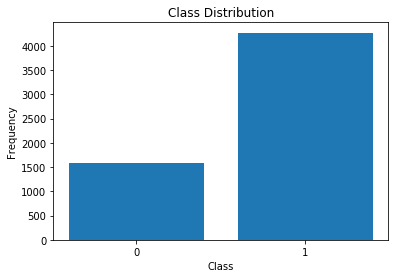

In [66]:
print('Data Shape:', data.shape, 'Labels Shape', labels.shape)
plotClassDist(labels)

Data Shape: (8546, 256, 256) Labels Shape (8546,)


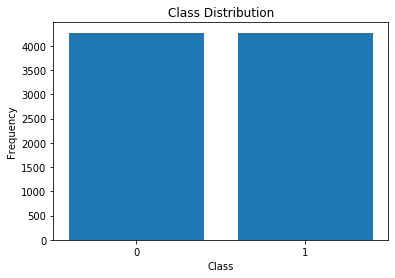

In [73]:
ovs_data, ovs_labels = randomOversample(data, labels)
print('Data Shape:', ovs_data.shape, 'Labels Shape', ovs_labels.shape)
plotClassDist(ovs_labels)

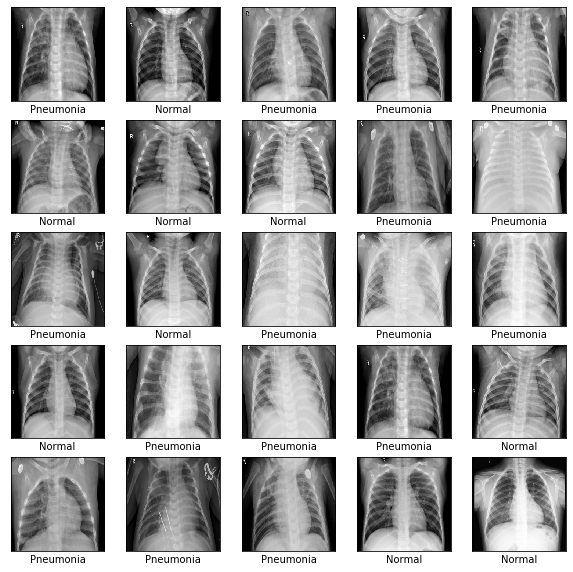

In [84]:
plotSamples(ovs_data, ovs_labels)

In [2]:
data, labels = loadData('data/ros_data.npz')

Loading data from data/ros_data.npz ... Done!


[[0.11422335 0.12156863 0.12156863 ... 0.1254902  0.11764706 0.11372549]
 [0.11422335 0.1254902  0.12156863 ... 0.12071844 0.12156863 0.11422335]
 [0.11030178 0.12156863 0.12156863 ... 0.11764706 0.12156863 0.11030178]
 ...
 [0.10588235 0.11230852 0.10980392 ... 0.1254902  0.12799479 0.11422335]
 [0.10245864 0.11372549 0.10980392 ... 0.1254902  0.12941176 0.11814491]
 [0.10196078 0.11372549 0.10990743 ... 0.1254902  0.1254902  0.11814491]]


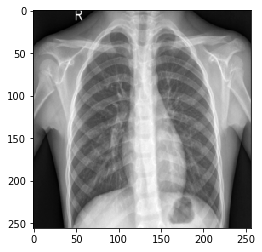

In [7]:
print(data[0, :, :])
plt.imshow(data[0, :, :], cmap=plt.cm.gray)

[[29 30 30 ... 32 30 29]
 [29 32 30 ... 30 31 29]
 [28 30 30 ... 30 31 28]
 ...
 [27 28 28 ... 32 32 29]
 [26 28 28 ... 32 32 30]
 [26 28 28 ... 32 32 30]]


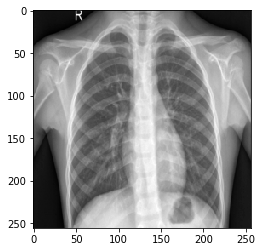

In [10]:
udata = np.asarray(255.0 * data).astype(np.uint8)
print(udata[0, :, :])
plt.imshow(udata[0, :, :], cmap=plt.cm.gray)


In [14]:
saveData('data/test.npz', udata, labels)

Saving data to data/test.npz ... Done!


In [17]:
np.unique(udata[0]).shape

(234,)